# How similar are Indonesian Embassies based on their location ?

### Problem Description

<b>Embassy</b> is a representative of a country in other countries, their existence help to indicate a relation among countries and serve as a way to communicate or strengthen the ties. Their location follows a strict and complex requirements both from the country it comes from and the country it resides, usually in a special diplomatic compound or district. Despite all of the careful planning and requirements, the decision to establish an embassy could have come from other necessities such as certain neighborhood/district/area, near to and close from certain amneties, places that could support the embassy mission etc.  

The knowledge of how a certain embassies are similar or different could <b>help give a bigger view to Indonesian Foreign Affairs Officials</b> to understand the general environment their embassies are located. Should a certain embassies need to be treated differently, do embassies with certain criteria experience the same or different stress level of working for their staffs, do certain embassies experience certain disturbance etc.

### What Data Do We Need ?

To accomplish the analysis we will need data on Indonesian Embassies abroad and their latitude and longitude and combine it with data from FourSquare API to get much more data about the embassy's neighborhood, venues and places surrounding the embassy. In which we will cluster and compare each embassy and find similarities between them and group them together.

### Data Gathering

#### 1. List of Indonesian Embassies abroad

Apparently to get data about the list of Indonesian Embassies abroad is going to be a bit difficult, because the Ministry of Foreign Affairs website doesn't display the data easily to be analize. But with the help of google and wikipedia we find a page that we could extract the data that we need.

In [28]:
list_of_ID_embassies = 'https://id.wikipedia.org/wiki/Kedutaan_besar_Republik_Indonesia'

#### Import the libraries that we need

In [1]:
#!conda install -c anaconda beautifulsoup4
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

#### Get the website page

In [30]:
page_list_of_ID_embassies  = requests.get(list_of_ID_embassies).text
page_list_of_ID_embassies

'<!DOCTYPE html>\n<html class="client-nojs" lang="id" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Kedutaan besar Republik Indonesia - Wikipedia bahasa Indonesia, ensiklopedia bebas</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.",".\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","Januari","Februari","Maret","April","Mei","Juni","Juli","Agustus","September","Oktober","November","Desember"],"wgRequestId":"5ebd99b1-d7d1-4820-9825-b544b9dffa70","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Kedutaan_besar_Republik_Indonesia","wgTitle":"Kedutaan besar Republik Indonesia","wgCurRevisionId":18023174,"wgRevisionId":18023174,"wgArticleId":28406,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Artikel dengan pranala luar nonaktif","Artikel dengan prana

#### Extract the website page for table of Indonesian Embassies

In [31]:
soup = BeautifulSoup(page_list_of_ID_embassies,"html5lib")

In [32]:
table = soup.find('table')
table

<table class="wikitable sortable" style="text-align: center;">

<tbody><tr>
<th>Perwakilan
</th>
<th>Duta Besar
</th>
<th>Pelantikan
</th>
<th>Website
</th>
<th>Merangkap
</th>
<th>Daftar
</th>
<th>Ref.
</th></tr>
<tr>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/23px-Flag_of_Afghanistan.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/35px-Flag_of_Afghanistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/45px-Flag_of_Afghanistan.svg.png 2x" width="23"/> </span><a href="/wiki/Afganistan" title="Afganistan">Afganistan</a>
</td>
<td><a href="/wiki/Arief_Rachman" title="Arief Rachman">Arief Rachman</a>
</td>
<td>13 Maret 2017
</td>
<td><a href="/wiki/Kedutaan_Besar_Republik_Indonesia_di_Kabul" title="Kedutaan Besar Republik

#### Table consists of Country , Ambassador, Inauguration, Website (Country Capital), Include, List, Ref

In [33]:
table_embassies=[] #List of ID Embassies
rows = table.findAll('tr')
for num, row in enumerate(rows, start=0):
    if num != 0 : #Skip the table header information
        cell = {}
        row_data = row.findAll('td')
        cell['Country'] = row_data[0].text
        cell['Capital'] = row_data[3].text
        table_embassies.append(cell)

#### See the top 10

In [34]:
table_embassies[:10]

[{'Country': '\xa0Afganistan\n', 'Capital': 'Kabul [1]\n'},
 {'Country': '\xa0Afrika Selatan\n', 'Capital': 'Pretoria [2]\n'},
 {'Country': '\xa0Aljazair\n', 'Capital': 'Algiers\n'},
 {'Country': '\xa0Amerika Serikat\n', 'Capital': 'Washington, D.C. [3]\n'},
 {'Country': '\xa0Arab Saudi\n', 'Capital': 'Riyadh\n'},
 {'Country': '\xa0Argentina\n', 'Capital': 'Buenos Aires [4]\n'},
 {'Country': '\xa0Australia\n', 'Capital': 'Canberra [5]\n'},
 {'Country': '\xa0Austria\n', 'Capital': 'Wina\n'},
 {'Country': '\xa0Azerbaijan\n', 'Capital': 'Baku\n'},
 {'Country': '\xa0Bahrain\n', 'Capital': 'Manama [6]\n'}]

#### Import pandas

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None) #Need to see all the rows

In [36]:
df_ID_embassies=pd.DataFrame(table_embassies)

In [37]:
df_ID_embassies.head(200)

,Country,Capital
0,Afganistan\n,Kabul [1]\n
1,Afrika Selatan\n,Pretoria [2]\n
2,Aljazair\n,Algiers\n
3,Amerika Serikat\n,"Washington, D.C. [3]\n"
4,Arab Saudi\n,Riyadh\n
5,Argentina\n,Buenos Aires [4]\n
6,Australia\n,Canberra [5]\n
7,Austria\n,Wina\n
8,Azerbaijan\n,Baku\n
9,Bahrain\n,Manama [6]\n


There are 98 Indonesian Embassies according to our data

#### Clean the data to avoid problems later

1. Get rid of the '\n'
2. Get rid of the []

In [38]:
df_ID_embassies['Country'] = df_ID_embassies['Country'].replace(f'(\n)', '',regex=True)
df_ID_embassies['Capital'] = df_ID_embassies['Capital'].replace(f'(\n)', '',regex=True)
df_ID_embassies['Capital'] = df_ID_embassies['Capital'].replace(f'(\[\d+\])', '',regex=True) #inside [] with one more digits

In [39]:
df_ID_embassies.head(100)

,Country,Capital
0,Afganistan,Kabul
1,Afrika Selatan,Pretoria
2,Aljazair,Algiers
3,Amerika Serikat,"Washington, D.C."
4,Arab Saudi,Riyadh
5,Argentina,Buenos Aires
6,Australia,Canberra
7,Austria,Wina
8,Azerbaijan,Baku
9,Bahrain,Manama


3. Drop Perbara since it's location is in Jakarta Indonesia Capital not abroad 

In [40]:
df_ID_embassies = df_ID_embassies.drop(62)

4. Drop Taiwan since Indonesia doesn't have an embassy there

In [41]:
df_ID_embassies = df_ID_embassies.drop(82)

5. Change Washington, D.C to Washington

In [42]:
df_ID_embassies.loc[3,'Capital'] ='Washington'

6. Drop Kamerun since it's handle by the embassy in Nigeria

In [43]:
df_ID_embassies = df_ID_embassies.drop(34)

7. Change Kairo to Cairo

In [44]:
df_ID_embassies.loc[50,'Capital'] ='Cairo'

8. Drop Indonesia Representative for the UN

In [45]:
df_ID_embassies = df_ID_embassies.drop(60)
df_ID_embassies = df_ID_embassies.drop(61)

9. Change Bukares to Bucharest

In [46]:
df_ID_embassies.loc[68,'Capital'] ='Bucharest'

10. Change Moskwa to Moscow

In [47]:
df_ID_embassies.loc[69,'Capital'] ='Moscow'

11. Change Kolombo to Colombo

In [48]:
df_ID_embassies.loc[76,'Capital'] ='Colombo'

12. Change Damaskus to Damascus

In [49]:
df_ID_embassies.loc[78,'Capital'] ='Damascus'

13. Change Vatikan to Vatican

In [50]:
df_ID_embassies.loc[83,'Capital'] ='Vatican'

14. Reset the Data Frame

In [51]:
df_ID_embassies = df_ID_embassies.reset_index(drop=True)
df_ID_embassies

,Country,Capital
0,Afganistan,Kabul
1,Afrika Selatan,Pretoria
2,Aljazair,Algiers
3,Amerika Serikat,Washington
4,Arab Saudi,Riyadh
5,Argentina,Buenos Aires
6,Australia,Canberra
7,Austria,Wina
8,Azerbaijan,Baku
9,Bahrain,Manama


#### Save the data

In [52]:
df_ID_embassies.to_csv('ID_Embassies.csv')

In [53]:
df_ID_embassies = pd.read_csv('ID_Embassies.csv',index_col=0)
df_ID_embassies

,Country,Capital
0,Afganistan,Kabul
1,Afrika Selatan,Pretoria
2,Aljazair,Algiers
3,Amerika Serikat,Washington
4,Arab Saudi,Riyadh
5,Argentina,Buenos Aires
6,Australia,Canberra
7,Austria,Wina
8,Azerbaijan,Baku
9,Bahrain,Manama


so the final tally is 93 Indonesian Embassies abroad

#### 2. Get Indonesian Embassies address

Since there are no data on latitude and longitude of the embassies, we need to get it's address then convert it later. This is also a problem since the data is not available easily to be extracted and analize. But there are similarities in the embassy website that we could explore

https://kemlu.go.id/CAPITAL

In [54]:
capitals = df_ID_embassies['Capital'].values

In [55]:
address = []
for capital in capitals:
    formated_capital = capital.lower().strip().replace(' ','')
    url = 'https://kemlu.go.id/{}/en'.format(formated_capital)
    embassy_website  = requests.get(url).text
    soup = BeautifulSoup(embassy_website,"html5lib")
    div_address = soup.find('div',{"class": "col-12 col-md-6 text-center text-md-left"}) #The Bottom part with the embassy address
    rows = div_address.findAll('a')
    for num, row in enumerate(rows, start=0):
        if num == 0:
            print(row.text)
            #embassies_address.loc[num,'Address']= row.text
            address.append(row.text)


                    
                    
                      Malalai Watt, Shah-re-Naw, Ministry of Interior Stret, Kabul, Afghanistan
                    
                

                    
                    
                      ​Embassy of the Republic of Indonesia
949 Francis Baard Street, Hatfield, Pretoria 0082
 
Postal Address
PO Box 13155 Hatfield 0082
Pretoria – South Africa
                    
                

                    
                    
                      Embassy of the Republic of Indonesia
-
61, Avenue Souidani Boudjemaa, B.P. 62, El Mouradia, Algiers, Algeria
                    
                

                    
                    
                      
                    
                

                    
                    
                      Diplomatic Quarter, P.O. Box 94343 - Riyadh 11693

                    
                

                    
                    
                      ​Mariscal Ramon Castilla 2901

#### Create a new DataFrame for the embassies address 

In [56]:
embassies_address = pd.DataFrame(data=address, columns=['Address']) 
embassies_address

,Address
0,\n \n \n...
1,\n \n \n...
2,\n \n \n...
3,\n \n \n...
4,\n \n \n...
5,\n \n \n...
6,\n \n \n...
7,\n \n \n...
8,\n \n \n...
9,\n \n \n...


apparently the address from scrapping each embassy website for the address needs a make over.

In [57]:
embassies_address['Address'] = embassies_address['Address'].str.strip()
embassies_address['Address'] = embassies_address['Address'].str.replace('^ +', '_',regex=True)
embassies_address['Address'] = embassies_address['Address'].str.replace(' +$', '_',regex=True)
embassies_address['Address'] = embassies_address['Address'].replace(r'\\n',' ', regex=True)
embassies_address['Address'] = embassies_address['Address'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True)
embassies_address['Address'] = embassies_address['Address'].replace(r"(?i)[^0-9a-z!?.;,@' -]",'',regex=True)
embassies_address

,Address
0,"Malalai Watt, Shah-re-Naw, Ministry of Interio..."
1,Embassy of the Republic of Indonesia949 Franci...
2,"Embassy of the Republic of Indonesia-61, Avenu..."
3,
4,"Diplomatic Quarter, P.O. Box 94343 - Riyadh 11693"
5,"Mariscal Ramon Castilla 2901, 1425 Capital Fed..."
6,Embassy of the Republic of IndonesiaAddress 8 ...
7,Embassy of the Republic of Indonesia in Vienna...
8,EMBASSY OF THE REPUBLIC OF INDONESIAAzer Aliye...
9,Embassy of the Republic of Indonesia to Bahrai...


I think we need to do it manually since the address format is not unison

#### Save the address and edit in manually

In [58]:
embassies_address.to_csv('embassies_address.csv')

#### Read the result

In [59]:
embassies_address = pd.read_csv('embassies_address_refine.csv')
embassies_address

,Address
0,Shah-re-Naw Ministry of Interior Street Kabul
1,949 Francis Baard Street Hatfield. Pretoria
2,Avenue Souidani Boudjemaa 61 Algiers
3,2020 Massachusetts Avenue NW. Washington DC
4,Diplomatic Quarter. Riyadh
5,Mariscal Ramon Castilla 2901. Buenos Aires
6,8 Darwin Avenue Yarralumla. Canberra
7,Gustav Tschermakgasse 5-7 Vienna
8,Azer Aliyev 3 Nasimi Baku
9,Villa 2113 Road 2432 Manama


#### Insert into the Indonesian Embassies DataFrame

In [60]:
df_ID_embassies['Address'] = embassies_address

In [61]:
df_ID_embassies

,Country,Capital,Address
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul
1,Afrika Selatan,Pretoria,949 Francis Baard Street Hatfield. Pretoria
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers
3,Amerika Serikat,Washington,2020 Massachusetts Avenue NW. Washington DC
4,Arab Saudi,Riyadh,Diplomatic Quarter. Riyadh
5,Argentina,Buenos Aires,Mariscal Ramon Castilla 2901. Buenos Aires
6,Australia,Canberra,8 Darwin Avenue Yarralumla. Canberra
7,Austria,Wina,Gustav Tschermakgasse 5-7 Vienna
8,Azerbaijan,Baku,Azer Aliyev 3 Nasimi Baku
9,Bahrain,Manama,Villa 2113 Road 2432 Manama


In [62]:
df_ID_embassies.to_csv('ID_Embassies_with_address.csv')
df_ID_embassies = pd.read_csv('ID_Embassies_with_address.csv',index_col=0)
df_ID_embassies

,Country,Capital,Address
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul
1,Afrika Selatan,Pretoria,949 Francis Baard Street Hatfield. Pretoria
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers
3,Amerika Serikat,Washington,2020 Massachusetts Avenue NW. Washington DC
4,Arab Saudi,Riyadh,Diplomatic Quarter. Riyadh
5,Argentina,Buenos Aires,Mariscal Ramon Castilla 2901. Buenos Aires
6,Australia,Canberra,8 Darwin Avenue Yarralumla. Canberra
7,Austria,Wina,Gustav Tschermakgasse 5-7 Vienna
8,Azerbaijan,Baku,Azer Aliyev 3 Nasimi Baku
9,Bahrain,Manama,Villa 2113 Road 2432 Manama


Let us try to get the longitude and latitude with geopy libraries

In [63]:
#conda install -c conda-forge geopy

In [3]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [4]:
geocoder = Nominatim(user_agent='embassies')
geocode = RateLimiter(geocoder.geocode, min_delay_seconds=3, return_value_on_exception=None)

#### Get the embassies addresses

In [66]:
address = df_ID_embassies['Address'].values

#### Loop all the addresses

In [67]:
long_and_lat = []
for addr in address:
    print(addr)
    location = geocode(addr)
    long_and_lat.append(location)

Shah-re-Naw Ministry of Interior Street Kabul
949 Francis Baard Street Hatfield. Pretoria
Avenue Souidani Boudjemaa 61 Algiers
2020 Massachusetts Avenue NW. Washington DC
Diplomatic Quarter. Riyadh
Mariscal Ramon Castilla 2901. Buenos Aires
8 Darwin Avenue Yarralumla. Canberra
Gustav Tschermakgasse 5-7 Vienna
Azer Aliyev 3 Nasimi Baku
Villa 2113 Road 2432 Manama
Road No 53 Plot No 14 Gulshan Dhaka
Tobias Asserlaan 8 Den Haag
Boulevardde la Woluwe 38 Brussels
Splitska 9. Sarajevo
SES Avenida Das Nacoes Quadra 805 Brasilia-DF
30 Great Peter Street. London
Jalan Kebangsaan Kampung Kawasan Diplomatik Mukim Kianggeh Bandar Seri Begawan
Simeonovsko Shosse Sofia
Nad Budankami II  7. Praha
Avenida Las Urbinas 160 Providencia. Santiago
Alle 1 Hellerup Copenhagen
CALLE QUITEO LIBRE E15 QUITO
Egypt Street Mekanissa Road Woreda 05  Addis Ababa
Marama Building  91 Gordon Street Fiji
Salcedo Street 185 Manila
Kuusisaarentie 3. Helsinki
Varosligeti fasor 26. Budapest
50-A Kautilya Marg Chanakyapuri. 

In [68]:
long_and_lat

[None,
 Location(Francis Baard Street, Hatfield, Tshwane Ward 56, Pretoria, City of Tshwane Metropolitan Municipality, Gauteng, 1166, South Africa, (-25.7458008, 28.2406273, 0.0)),
 None,
 Location(Embassy of Indonesia, 2020, Massachusetts Avenue Northwest, Dupont Circle and surrunding block, Dupont Circle, Washington, District of Columbia, 20036-5305, United States, (38.9102789, -77.0461492, 0.0)),
 Location(Diplomatic Quarter, حي السفارات, عرقة, Municipalty of Irqah, الرياض, منطقة الرياض, السعودية, (24.677103449999997, 46.625145184164424, 0.0)),
 Location(Embajada de Indonesia, 2901, Mariscal Ramón Castilla, Barrio Parque, Palermo, Buenos Aires, Comuna 14, Ciudad Autónoma de Buenos Aires, 1425, Argentina, (-34.5791904, -58.399681164365234, 0.0)),
 Location(Darwin Avenue, Yarralumla, Canberra, District of Canberra Central, Australian Capital Territory, 2600, Australia, (-35.3035676, 149.1154008, 0.0)),
 None,
 None,
 Location(Villa, طريق 2502, القضيبية, المنامة, محافظة العاصمة, 308, ا

#### Format the result in a DataFrame

In [69]:
geolocation = []
for num, geo in enumerate(long_and_lat, start=0):
    try:
      #print(num, geo.latitude, geo.longitude)
        geolocation.append({'latitude':geo.latitude, 'longitude':geo.longitude})
    except:
        geolocation.append({'latitude':0, 'longitude':0})
geolocation        

[{'latitude': 0, 'longitude': 0},
 {'latitude': -25.7458008, 'longitude': 28.2406273},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 38.9102789, 'longitude': -77.0461492},
 {'latitude': 24.677103449999997, 'longitude': 46.625145184164424},
 {'latitude': -34.5791904, 'longitude': -58.399681164365234},
 {'latitude': -35.3035676, 'longitude': 149.1154008},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 26.222771450000003, 'longitude': 50.58894775365927},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 52.0861442, 'longitude': 4.2886995},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 43.8507066, 'longitude': 18.4035497},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 51.4968935, 'longitude': -0.1295604},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 50.0711315, 'longitude': 14.3729314},
 {'latitude': -33.4221722, 'longitude': -70.6120543},
 {'latitude': 55.7222381, 'longitude': 12.5595906},
 {'latitude': 0, 'longit

#### Make geolocation DataFrame

In [70]:
embassies_geolocation = pd.DataFrame(data=geolocation, columns=['latitude','longitude']) 
embassies_geolocation

,latitude,longitude
0,0.000000,0.000000
1,-25.745801,28.240627
2,0.000000,0.000000
3,38.910279,-77.046149
4,24.677103,46.625145
5,-34.579190,-58.399681
6,-35.303568,149.115401
7,0.000000,0.000000
8,0.000000,0.000000
9,26.222771,50.588948


#### Combine with the Indonesian Embassies DataFrame

In [71]:
df_ID_embassies = df_ID_embassies.join(embassies_geolocation)
df_ID_embassies

,Country,Capital,Address,latitude,longitude
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul,0.000000,0.000000
1,Afrika Selatan,Pretoria,949 Francis Baard Street Hatfield. Pretoria,-25.745801,28.240627
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers,0.000000,0.000000
3,Amerika Serikat,Washington,2020 Massachusetts Avenue NW. Washington DC,38.910279,-77.046149
4,Arab Saudi,Riyadh,Diplomatic Quarter. Riyadh,24.677103,46.625145
5,Argentina,Buenos Aires,Mariscal Ramon Castilla 2901. Buenos Aires,-34.579190,-58.399681
6,Australia,Canberra,8 Darwin Avenue Yarralumla. Canberra,-35.303568,149.115401
7,Austria,Wina,Gustav Tschermakgasse 5-7 Vienna,0.000000,0.000000
8,Azerbaijan,Baku,Azer Aliyev 3 Nasimi Baku,0.000000,0.000000
9,Bahrain,Manama,Villa 2113 Road 2432 Manama,26.222771,50.588948


#### Save the results

In [72]:
df_ID_embassies.to_csv('ID_Embassies_with_geolocation.csv')

#### See which embassies has geolocation

In [73]:
embassies_with_geolocation = df_ID_embassies[df_ID_embassies['latitude'] != 0]
embassies_with_geolocation

,Country,Capital,Address,latitude,longitude
1,Afrika Selatan,Pretoria,949 Francis Baard Street Hatfield. Pretoria,-25.745801,28.240627
3,Amerika Serikat,Washington,2020 Massachusetts Avenue NW. Washington DC,38.910279,-77.046149
4,Arab Saudi,Riyadh,Diplomatic Quarter. Riyadh,24.677103,46.625145
5,Argentina,Buenos Aires,Mariscal Ramon Castilla 2901. Buenos Aires,-34.579190,-58.399681
6,Australia,Canberra,8 Darwin Avenue Yarralumla. Canberra,-35.303568,149.115401
9,Bahrain,Manama,Villa 2113 Road 2432 Manama,26.222771,50.588948
11,Belanda,Den Haag,Tobias Asserlaan 8 Den Haag,52.086144,4.288699
13,Bosnia dan Herzegovina,Sarajevo,Splitska 9. Sarajevo,43.850707,18.403550
15,Britania Raya,London,30 Great Peter Street. London,51.496893,-0.129560
18,Ceko,Praha,Nad Budankami II 7. Praha,50.071131,14.372931


In [74]:
embassies_without_geolocation = df_ID_embassies[df_ID_embassies['latitude'] == 0]
embassies_without_geolocation

,Country,Capital,Address,latitude,longitude
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul,0.0,0.0
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers,0.0,0.0
7,Austria,Wina,Gustav Tschermakgasse 5-7 Vienna,0.0,0.0
8,Azerbaijan,Baku,Azer Aliyev 3 Nasimi Baku,0.0,0.0
10,Bangladesh,Dhaka,Road No 53 Plot No 14 Gulshan Dhaka,0.0,0.0
12,Belgia,Brussels,Boulevardde la Woluwe 38 Brussels,0.0,0.0
14,Brasil,Brasilia,SES Avenida Das Nacoes Quadra 805 Brasilia-DF,0.0,0.0
16,Brunei,Bandar Seri Begawan,Jalan Kebangsaan Kampung Kawasan Diplomatik Mu...,0.0,0.0
17,Bulgaria,Sofia,Simeonovsko Shosse Sofia,0.0,0.0
21,Ekuador,Quito,CALLE QUITEO LIBRE E15 QUITO,0.0,0.0


so we have some embassies without geolocation from the geopy libraries

In [75]:
embassies_without_geolocation.shape

(40, 5)

#### Let's make a dict from the DataFrame

In [76]:
address_list = embassies_without_geolocation[['Address']].to_dict()
address_list

{'Address': {0: 'Shah-re-Naw Ministry of Interior Street Kabul',
  2: 'Avenue Souidani Boudjemaa 61 Algiers',
  7: 'Gustav Tschermakgasse 5-7 Vienna',
  8: 'Azer Aliyev 3 Nasimi Baku',
  10: 'Road No 53 Plot No 14 Gulshan Dhaka',
  12: 'Boulevardde la Woluwe 38 Brussels',
  14: 'SES Avenida Das Nacoes Quadra 805 Brasilia-DF',
  16: 'Jalan Kebangsaan Kampung Kawasan Diplomatik Mukim Kianggeh Bandar Seri Begawan',
  17: 'Simeonovsko Shosse Sofia',
  21: 'CALLE QUITEO LIBRE E15 QUITO',
  22: 'Egypt Street Mekanissa Road Woreda 05  Addis Ababa',
  23: 'Marama Building  91 Gordon Street Fiji',
  28: "Salhiya Hay Al-l'lam 220  Zukak 5 Baghdad",
  29: 'Ghaemmagham 180 Tehran',
  33: 'Street 268 Preah Suramarit Boulevard Phnom Penh',
  35: 'Saraishyk Street Diplomatic town. Nur-Sultan',
  39: 'Munsudong Taedonggang Distric Pyongyang',
  40: 'Ulica Medveak 56 Zagreb',
  42: 'Daiya Block 1 Rashed Ahmed Al-Roumi Street',
  44: 'Presidential Palace Avenue Rue 68 Sector 3 Beirut',
  45: 'Hay Al Kar

Let us try to get the longitude and latitude with positionstack API

In [77]:
import http.client, urllib.parse
import json

In [78]:
conn = http.client.HTTPConnection('api.positionstack.com')
access_key = ''
geolocation = []

for data in address_list:
    #print(address_list[data])
    for key in address_list[data]:
        #print(address_list[data][key])
        params = urllib.parse.urlencode({
        'access_key': access_key,
        'query': address_list[data][key],
        #'region': 'kabul',
        'limit': 1,
        })
        
        conn.request('GET', '/v1/forward?{}'.format(params))
        res = conn.getresponse()
        api_data = res.read()
        result = json.loads(api_data.decode('utf-8'))
        try:
            geolocation.append({key:(result['data'][0]['latitude'],result['data'][0]['longitude'])})
        except:
            geolocation.append({key:(0,0)})
        
geolocation

[{0: (0, 0)},
 {2: (36.74395, 3.083627)},
 {7: (48.198674, 16.348388)},
 {8: (0, 0)},
 {10: (0, 0)},
 {12: (50.843183, 4.371755)},
 {14: (-16.793428, -49.295322)},
 {16: (4.889737, 114.941695)},
 {17: (42.834585, 24.221365)},
 {21: (-0.22985, -78.52495)},
 {22: (9.018947, 38.746032)},
 {23: (-18.144302, 178.426665)},
 {28: (0, 0)},
 {29: (35.69439, 51.42151)},
 {33: (0, 0)},
 {35: (0, 0)},
 {39: (0, 0)},
 {40: (45.806026, 15.976218)},
 {42: (0, 0)},
 {44: (0, 0)},
 {45: (0, 0)},
 {46: (3.146757, 101.721745)},
 {47: (34.01325, -6.83255)},
 {48: (19.42798, -99.197181)},
 {49: (30.079694, 31.323437)},
 {50: (-25.96553, 32.58322)},
 {51: (16.80528, 96.15611)},
 {53: (9.06853, 7.48375)},
 {55: (0, 0)},
 {56: (33.72148, 73.04329)},
 {57: (30.233829, -85.89016)},
 {58: (-9.434881, 147.208705)},
 {60: (0, 0)},
 {63: (25.333074, 51.511092)},
 {65: (55.741469, 37.615561)},
 {73: (15.55177, 32.53241)},
 {74: (0, 0)},
 {83: (33.687264, 9.007775)},
 {85: (24.365906, 54.582223)},
 {87: (41.26465, 69

#### Update The Value of Embassies without geolocation

In [79]:
for data in geolocation:
    for key in data:
        embassies_without_geolocation.loc[key,'latitude'] = data[key][0]
        embassies_without_geolocation.loc[key,'longitude'] = data[key][1]
        #print(data[key][0], data[key][1])###latitude, longitude

/Users/boy.setiawan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [80]:
embassies_without_geolocation #embassies_with_geolocation

,Country,Capital,Address,latitude,longitude
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul,0.000000,0.000000
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
7,Austria,Wina,Gustav Tschermakgasse 5-7 Vienna,48.198674,16.348388
8,Azerbaijan,Baku,Azer Aliyev 3 Nasimi Baku,0.000000,0.000000
10,Bangladesh,Dhaka,Road No 53 Plot No 14 Gulshan Dhaka,0.000000,0.000000
12,Belgia,Brussels,Boulevardde la Woluwe 38 Brussels,50.843183,4.371755
14,Brasil,Brasilia,SES Avenida Das Nacoes Quadra 805 Brasilia-DF,-16.793428,-49.295322
16,Brunei,Bandar Seri Begawan,Jalan Kebangsaan Kampung Kawasan Diplomatik Mu...,4.889737,114.941695
17,Bulgaria,Sofia,Simeonovsko Shosse Sofia,42.834585,24.221365
21,Ekuador,Quito,CALLE QUITEO LIBRE E15 QUITO,-0.229850,-78.524950


In [81]:
new_embassies_geo = embassies_without_geolocation[['latitude','longitude']].to_dict()
new_embassies_geo

{'latitude': {0: 0.0,
  2: 36.74395,
  7: 48.198674,
  8: 0.0,
  10: 0.0,
  12: 50.843183,
  14: -16.793428,
  16: 4.889737,
  17: 42.834585,
  21: -0.22985,
  22: 9.018947,
  23: -18.144302,
  28: 0.0,
  29: 35.69439,
  33: 0.0,
  35: 0.0,
  39: 0.0,
  40: 45.806026,
  42: 0.0,
  44: 0.0,
  45: 0.0,
  46: 3.146757,
  47: 34.01325,
  48: 19.42798,
  49: 30.079694,
  50: -25.96553,
  51: 16.80528,
  53: 9.06853,
  55: 0.0,
  56: 33.72148,
  57: 30.233829,
  58: -9.434881,
  60: 0.0,
  63: 25.333074,
  65: 55.741469,
  73: 15.55177,
  74: 0.0,
  83: 33.687264,
  85: 24.365906,
  87: 41.26465},
 'longitude': {0: 0.0,
  2: 3.083627,
  7: 16.348388,
  8: 0.0,
  10: 0.0,
  12: 4.371755,
  14: -49.295322,
  16: 114.941695,
  17: 24.221365,
  21: -78.52495,
  22: 38.746032,
  23: 178.426665,
  28: 0.0,
  29: 51.42151,
  33: 0.0,
  35: 0.0,
  39: 0.0,
  40: 15.976218,
  42: 0.0,
  44: 0.0,
  45: 0.0,
  46: 101.721745,
  47: -6.83255,
  48: -99.197181,
  49: 31.323437,
  50: 32.58322,
  51: 96.1

In [82]:
for num, data in enumerate(new_embassies_geo):
    for key in new_embassies_geo[data]:
        if num == 0:
            #print(key)
            #print(new_embassies_geo[data][key])
            df_ID_embassies.loc[key,'latitude'] = new_embassies_geo[data][key]
        else:
        #    print(new_embassies_geo[data][key])
            df_ID_embassies.loc[key,'longitude'] = new_embassies_geo[data][key]

In [83]:
df_ID_embassies

,Country,Capital,Address,latitude,longitude
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul,0.000000,0.000000
1,Afrika Selatan,Pretoria,949 Francis Baard Street Hatfield. Pretoria,-25.745801,28.240627
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
3,Amerika Serikat,Washington,2020 Massachusetts Avenue NW. Washington DC,38.910279,-77.046149
4,Arab Saudi,Riyadh,Diplomatic Quarter. Riyadh,24.677103,46.625145
5,Argentina,Buenos Aires,Mariscal Ramon Castilla 2901. Buenos Aires,-34.579190,-58.399681
6,Australia,Canberra,8 Darwin Avenue Yarralumla. Canberra,-35.303568,149.115401
7,Austria,Wina,Gustav Tschermakgasse 5-7 Vienna,48.198674,16.348388
8,Azerbaijan,Baku,Azer Aliyev 3 Nasimi Baku,0.000000,0.000000
9,Bahrain,Manama,Villa 2113 Road 2432 Manama,26.222771,50.588948


#### Save it

In [61]:
df_ID_embassies.to_csv('ID_Embassies_with_geolocation.csv')
df_ID_embassies = pd.read_csv('ID_Embassies_with_geolocation.csv',index_col=0)
df_ID_embassies

,Country,Capital,Address,latitude,longitude
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul,34.531210,69.179090
1,Afrika Selatan,Pretoria,949 Francis Baard Street Hatfield. Pretoria,-25.745801,28.240627
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
3,Amerika Serikat,Washington,2020 Massachusetts Avenue NW. Washington DC,38.910279,-77.046149
4,Arab Saudi,Riyadh,Diplomatic Quarter. Riyadh,24.677103,46.625145
5,Argentina,Buenos Aires,Mariscal Ramon Castilla 2901. Buenos Aires,-34.579190,-58.399681
6,Australia,Canberra,8 Darwin Avenue Yarralumla. Canberra,-35.303568,149.115401
7,Austria,Wina,Gustav Tschermakgasse 5-7 Vienna,48.198674,16.348388
8,Azerbaijan,Baku,Azer Aliyev 3 Nasimi Baku,40.395740,49.821620
9,Bahrain,Manama,Villa 2113 Road 2432 Manama,26.222771,50.588948


let's see which embassy is without geolocation

In [62]:
embassies_without_geolocation = df_ID_embassies[df_ID_embassies['latitude'] == 0]
embassies_without_geolocation

,Country,Capital,Address,latitude,longitude


let's do it manually for this

embassy at kabul

In [63]:
df_ID_embassies.loc[0,'latitude'] = 34.53121
df_ID_embassies.loc[0,'longitude'] = 69.17909

embassy at azerbaijan

In [64]:
df_ID_embassies.loc[8,'latitude'] = 40.39574
df_ID_embassies.loc[8,'longitude'] = 49.82162

embassy at bangladesh

In [65]:
df_ID_embassies.loc[10,'latitude'] = 23.79615
df_ID_embassies.loc[10,'longitude'] = 90.41278

embassy at iraq

In [66]:
df_ID_embassies.loc[28,'latitude'] = 33.31959
df_ID_embassies.loc[28,'longitude'] = 44.38639

embassy at kamboja

In [67]:
df_ID_embassies.loc[33,'latitude'] = 11.55729
df_ID_embassies.loc[33,'longitude'] = 104.93018

embassy at kazakhstan

In [68]:
df_ID_embassies.loc[35,'latitude'] = 51.13426
df_ID_embassies.loc[35,'longitude'] = 71.42582

embassy at north korea

In [69]:
df_ID_embassies.loc[39,'latitude'] = 39.02403
df_ID_embassies.loc[39,'longitude'] = 125.78696

embassy at kuwait

In [70]:
df_ID_embassies.loc[42,'latitude'] = 29.35440
df_ID_embassies.loc[42,'longitude'] = 48.00986

embassy at lebanon

In [71]:
df_ID_embassies.loc[44,'latitude'] = 33.84539
df_ID_embassies.loc[44,'longitude'] = 35.54188

embassy at libya

In [72]:
df_ID_embassies.loc[45,'latitude'] = 32.83909
df_ID_embassies.loc[45,'longitude'] = 13.08216

embassy at oman

In [73]:
df_ID_embassies.loc[55,'latitude'] = 23.60581
df_ID_embassies.loc[55,'longitude'] = 58.45013

embassy at poland

In [74]:
df_ID_embassies.loc[60,'latitude'] = 52.23664
df_ID_embassies.loc[60,'longitude'] = 21.04847

embassy at suriah

In [98]:
df_ID_embassies.loc[74,'latitude'] = 33.49765
df_ID_embassies.loc[74,'longitude'] = 36.25101

and we have one off value for the one in panama

In [75]:
df_ID_embassies.loc[57,'latitude'] = 8.98459
df_ID_embassies.loc[57,'longitude'] = -79.52024

#### Save it

In [76]:
df_ID_embassies.to_csv('ID_Embassies_with_geolocation.csv')

In [77]:
df_ID_embassies = pd.read_csv('ID_Embassies_with_geolocation.csv',index_col=0)
df_ID_embassies

,Country,Capital,Address,latitude,longitude
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul,34.531210,69.179090
1,Afrika Selatan,Pretoria,949 Francis Baard Street Hatfield. Pretoria,-25.745801,28.240627
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
3,Amerika Serikat,Washington,2020 Massachusetts Avenue NW. Washington DC,38.910279,-77.046149
4,Arab Saudi,Riyadh,Diplomatic Quarter. Riyadh,24.677103,46.625145
5,Argentina,Buenos Aires,Mariscal Ramon Castilla 2901. Buenos Aires,-34.579190,-58.399681
6,Australia,Canberra,8 Darwin Avenue Yarralumla. Canberra,-35.303568,149.115401
7,Austria,Wina,Gustav Tschermakgasse 5-7 Vienna,48.198674,16.348388
8,Azerbaijan,Baku,Azer Aliyev 3 Nasimi Baku,40.395740,49.821620
9,Bahrain,Manama,Villa 2113 Road 2432 Manama,26.222771,50.588948


In [78]:
#conda install -c conda-forge folium

In [34]:
import folium #Library for maps

let's see if the coordinates is correct for embassy in washington

In [80]:
folium.Map(location=[df_ID_embassies.loc[3,'latitude'], df_ID_embassies.loc[3,'longitude']], zoom_start=50)

#### 3. Get Venues near the embassies

#### FourSquare API

In [81]:
CLIENT_ID = 'W4LDO5WODUITCC3VZWCQNPHVVYTTAYF5TFFXOBA1OAS3LJSP' # your Foursquare ID
CLIENT_SECRET = 'B3V1V2MLDWQWG5Y4YW5FH5TZXVTFJBEUL1FHSEUBLJTNM2JF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
#ACCESS_TOKEN = ''
radius = 500

In [82]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    index = 1
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(index, name)
        index += 1
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Embassy', 
                  'Embassy Latitude', 
                  'Embassy Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [83]:
embassies_venues = getNearbyVenues(names=df_ID_embassies['Capital'],
                                   latitudes=df_ID_embassies['latitude'],
                                   longitudes=df_ID_embassies['longitude']
                                  )

1 Kabul 
2 Pretoria 
3 Algiers
4 Washington
5 Riyadh
6 Buenos Aires 
7 Canberra 
8 Wina
9 Baku
10 Manama 
11 Dhaka 
12 Den Haag 
13 Brussels 
14 Sarajevo
15 Brasilia 
16 London 
17 Bandar Seri Begawan 
18 Sofia
19 Praha 
20 Santiago
21 Kopenhagen 
22 Quito
23 Addis Ababa 
24 Suva
25 Manila
26 Helsinki 
27 Budapest 
28 New Delhi
29 Baghdad
30 Tehran
31 Rome
32 Tokyo 
33 Berlin 
34 Phnom Penh
35 Ottawa
36 Astana
37 Nairobi
38 Bogota 
39 Seoul
40 Pyongyang 
41 Zagreb
42 Havana 
43 Kuwait City 
44 Vientiane
45 Beirut 
46 Tripoli
47 Kuala Lumpur 
48 Rabat
49 Mexico City
50 Cairo
51 Maputo
52 Yangon
53 Windhoek 
54 Abuja 
55 Oslo 
56 Muscat
57 Islamabad 
58 Panama
59 Port Moresby
60 Lima 
61 Warsawa 
62 Lisabon 
63 Paris 
64 Doha 
65 Bucharest
66 Moscow
67 Wellington
68 Dakar
69 Beograd
70 Singapura
71 Bratislava
72 Madrid 
73 Colombo
74 Khartoum
75 Damascus
76 Paramaribo
77 Stockholm 
78 Bern 
79 Vatican
80 Dar es Salaam 
81 Bangkok 
82 Dili 
83 Beijing 
84 Tunis
85 Ankara 
86 Abu Dhabi 
87

In [84]:
embassies_venues.shape

(2329, 7)

there are 2329 venues for the embassies

In [85]:
embassies_venues.head()

,Embassy,Embassy Latitude,Embassy Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kabul,34.531210,69.179090,Kabul Star Hotel,34.531202,69.177159,Hotel
1,Kabul,34.531210,69.179090,Green Beans Coffee,34.529924,69.179781,Coffee Shop
2,Kabul,34.531210,69.179090,Bukhara Restaurant,34.529789,69.179680,Afghan Restaurant
3,Kabul,34.531210,69.179090,Spinneys Supermarket,34.533478,69.178270,Supermarket
4,Pretoria,-25.745801,28.240627,Royal Danish Icecream,-25.742076,28.242174,Ice Cream Shop


#### Save the Data

In [86]:
embassies_venues.to_csv('ID_Embassies_with_venues.csv')

In [2]:
embassies_venues = pd.read_csv('ID_Embassies_with_venues.csv',index_col=0)
embassies_venues.head(10)

,Embassy,Embassy Latitude,Embassy Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kabul,34.531210,69.179090,Kabul Star Hotel,34.531202,69.177159,Hotel
1,Kabul,34.531210,69.179090,Green Beans Coffee,34.529924,69.179781,Coffee Shop
2,Kabul,34.531210,69.179090,Bukhara Restaurant,34.529789,69.179680,Afghan Restaurant
3,Kabul,34.531210,69.179090,Spinneys Supermarket,34.533478,69.178270,Supermarket
4,Pretoria,-25.745801,28.240627,Royal Danish Icecream,-25.742076,28.242174,Ice Cream Shop
5,Pretoria,-25.745801,28.240627,Namaskar Indian Restaurant,-25.742667,28.242235,Indian Restaurant
6,Pretoria,-25.745801,28.240627,Gautrain Hatfield Station,-25.747655,28.237484,Train Station
7,Pretoria,-25.745801,28.240627,Steers,-25.744297,28.245228,Fast Food Restaurant
8,Pretoria,-25.745801,28.240627,KFC Gordon Road,-25.743100,28.242200,Fried Chicken Joint
9,Pretoria,-25.745801,28.240627,Dros,-25.744867,28.236806,Pub


#### See the venues in each embassies

In [3]:
embassies_venues.groupby('Embassy').count().sort_values(by='Venue Category',ascending=False).head(100)

,Embassy Latitude,Embassy Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Embassy,,,,,,
Mexico City,100,100,100,100,100,100
Manila,100,100,100,100,100,100
Washington,95,95,95,95,95,95
Moscow,95,95,95,95,95,95
Seoul,87,87,87,87,87,87
Rome,84,84,84,84,84,84
Panama,78,78,78,78,78,78
Berlin,72,72,72,72,72,72
Athena,65,65,65,65,65,65


we see that the top 3 embassies with the most venue are manila, mexico and washington and the least are ottawa, addis ababa and abu dhabi

#### How many categories of venues are there

In [4]:
print('There are {} uniques categories.'.format(len(embassies_venues['Venue Category'].unique())))

There are 325 uniques categories.


let's see what are they

In [5]:
venues = embassies_venues['Venue Category'].unique()
venues

array(['Hotel', 'Coffee Shop', 'Afghan Restaurant', 'Supermarket',
       'Ice Cream Shop', 'Indian Restaurant', 'Train Station',
       'Fast Food Restaurant', 'Fried Chicken Joint', 'Pub',
       'Gas Station', 'Food Truck', 'Moroccan Restaurant',
       'Metro Station', 'Restaurant', 'Farmers Market',
       'Asian Restaurant', 'Salad Place', 'Art Museum', 'Bookstore',
       'Comic Shop', 'Greek Restaurant', 'Furniture / Home Store', 'Park',
       'Pizza Place', 'Social Club', 'Gym', 'Middle Eastern Restaurant',
       'Massage Studio', 'Veterinarian', 'Café', 'Sandwich Place',
       'Event Space', 'Japanese Restaurant', 'Hotel Bar', 'Fountain',
       'History Museum', 'Italian Restaurant', 'Bakery',
       'Electronics Store', 'Health & Beauty Service', 'Tea Room',
       'Gym / Fitness Center', 'Wine Bar', 'Pilates Studio',
       'Yoga Studio', 'Thai Restaurant', 'Clothing Store', 'Bagel Shop',
       'French Restaurant', 'Art Gallery', 'Trail', 'Cosmetics Shop',
       'Spa'

Let's group all the restaurants as one value of restaurant since we don't really care about the speciality

In [6]:
restaurants = [data for data in venues if "Restaurant" in data]

In [7]:
for restaurant in restaurants:
    embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(f'(^.*{restaurant}.*$)', "Restaurant",regex=True)

Let's group all the stores as several value of store based on their similarity

In [8]:
stores = [data for data in venues if "Store" in data]
stores

['Furniture / Home Store',
 'Electronics Store',
 'Clothing Store',
 'Arts & Crafts Store',
 'Grocery Store',
 'Stationery Store',
 "Men's Store",
 'Convenience Store',
 'Toy / Game Store',
 'Accessories Store',
 'Paper / Office Supplies Store',
 'Department Store',
 'Pet Store',
 'Knitting Store',
 'Music Store',
 'Luggage Store',
 'Leather Goods Store',
 'Lighting Store',
 'Camera Store',
 'Shoe Store',
 "Women's Store",
 'Candy Store',
 'Jewelry Store',
 'Shipping Store',
 'Discount Store',
 'Big Box Store']

In [9]:
for store in stores:
    if store == 'Furniture / Home Store':
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(store, "Home Store")
    elif store == "Men's Store" or store == 'Knitting Store' or store == 'Shoe Store' or store == "Women's Store":
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(store, "Clothing Store")
    elif store == 'Convenience Store':
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(store, "Grocery Store")
    elif store == 'Paper / Office Supplies Store':
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(store, "Stationery Store")
    elif store == 'Camera Store' or store == 'Lighting Store':
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(store, "Electronics Store")
    

Let's group all the shops as several value of shop based on their similarity

In [10]:
shops = [data for data in venues if "Shop" in data]
shops

['Coffee Shop',
 'Ice Cream Shop',
 'Comic Shop',
 'Bagel Shop',
 'Cosmetics Shop',
 'Donut Shop',
 'Gourmet Shop',
 'Gift Shop',
 'Dessert Shop',
 'Optical Shop',
 'Cupcake Shop',
 'Pastry Shop',
 'Hobby Shop',
 'Miscellaneous Shop',
 'Fish & Chips Shop',
 'Chocolate Shop',
 'Sporting Goods Shop',
 'Shopping Mall',
 'Board Shop',
 'Bubble Tea Shop',
 'Fabric Shop',
 'Antique Shop',
 'Betting Shop',
 'Food & Drink Shop',
 'Cheese Shop',
 'Souvenir Shop',
 'Smoke Shop',
 'Wine Shop',
 'Other Repair Shop',
 'Pie Shop',
 'Tailor Shop',
 'Automotive Shop',
 'Shop & Service',
 'Smoothie Shop',
 'Flower Shop',
 'Mobile Phone Shop',
 'Frozen Yogurt Shop',
 'Souvlaki Shop',
 'Bougatsa Shop',
 'Motorcycle Shop',
 'Shopping Plaza']

In [11]:
for shop in shops:
    if shop == "Smoothie Shop" or shop == 'Coffee Shop':
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(shop, "Drink Shop")
    elif shop == "Bougatsa Shop" or shop == "Souvlaki Shop" or shop == "Frozen Yogurt Shop" or shop == "Pie Shop" or shop == "Pie Shop" or shop == "Cheese Shop" or shop == "Food & Drink Shop" or shop == "Bubble Tea Shop" or shop == "Chocolate Shop" or shop == "Fish & Chips Shop" or shop == "Pastry Shop" or shop == "Cupcake Shop" or shop == "Ice Cream Shop" or shop == 'Bagel Shop' or shop == 'Donut Shop' or shop == "Gourmet Shop" or shop == 'Dessert Shop':
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(shop, "Food Shop")
    elif shop == "Mobile Phone Shop":
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(shop, "Electronics Store")
    elif shop == "Motorcycle Shop":
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(shop, "Automotive Shop")
      

Let's group all the joints as Food Store based on their similarity

In [12]:
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Joint.*$)', "Food Store",regex=True)

Let's group all the bars as bar based on their similarity

In [13]:
bars = [data for data in venues if "Bar" in data]

In [14]:
for bar in bars:
    if bar == "Sports Bar" or bar == "Karaoke Bar" or bar == "Dive Bar" or bar == "Hookah Bar" or bar == "Cocktail Bar" or bar == "Beer Bar" or bar == "Whisky Bar" or bar == "Hotel Bar" or bar == 'Wine Bar':
        embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace(bar, "Bar")

Let's do the rest

In [15]:
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Juice Bar.*$)', "Drink Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Barbershop.*$)', "Barbershop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Farmers Market.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Place.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Museum.*$)', "Museum",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Gym.*$)', "Gym",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Bistro.*$)', "Restaurant",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Steakhouse.*$)', "Restaurant",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Breakfast Spot.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Creperie.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Hotel.*$)', "Hotel",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Drugstore.*$)', "Pharmacy",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Deli.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Street Food Gathering.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Food Truck.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Food Stand.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('Food', "Food Shop")
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Garden.*$)', "Garden",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Diner.*$)', "Restaurant",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Café.*$)', "Café",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Pub.*$)', "Bar",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Bed & Breakfast.*$)', "Hostel",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Field.*$)', "Field",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Basketball Court.*$)', "Field",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Basketball.*$)', "Field",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Volleyball.*$)', "Field",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Stadium.*$)', "Stadium",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Noodle.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Buffet.*$)', "Restaurant",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Club.*$)', "Club",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*club.*$)', "Club",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Tea Room.*$)', "Café",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Bakery.*$)', "Food Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Health & Beauty Service.*$)', "Salon",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Monument / Landmark.*$)', "Landmark",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Historic Site.*$)', "Landmark",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Gastropub.*$)', "Restaurant",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Sculpture.*$)', "Landmark",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Tabbakhi.*$)', "Restaurant",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Trattoria.*$)', "Restaurant",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Cafeteria.*$)', "Café",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Boarding House.*$)', "Hostel",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Boutique.*$)', "Boutique",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Art Gallery.*$)', "Arts & Entertainment",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Performing Arts Venue.*$)', "Arts & Entertainment",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Massage Studio.*$)', "Health Studio",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Yoga Studio.*$)', "Health Studio",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Pilates Studio.*$)', "Health Studio",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Airport.*$)', "Airport",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Souvenir.*$)', "Gift Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Betting Shop.*$)', "Miscellaneous Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Sporting Goods Shop.*$)', "Hobby Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Fabric Shop.*$)', "Tailor Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Shop & Service.*$)', "Miscellaneous Shop",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Food Store.*$)', "Grocery Store",regex=True)
embassies_venues['Venue Category'] = embassies_venues['Venue Category'].replace('(^.*Candy Store.*$)', "Food Shop",regex=True)


In [16]:
print('There are {} uniques categories.'.format(len(embassies_venues['Venue Category'].unique())))

There are 143 uniques categories.


In [17]:
embassies_with_venues = embassies_venues['Embassy'].unique()

In [18]:
embassies_with_no_venues = df_ID_embassies[~df_ID_embassies['Capital'].isin(embassies_with_venues)]
embassies_with_no_venues

NameError: name 'df_ID_embassies' is not defined

looks like we have some embassies with no venue data.

#### Split each embassy category

In [20]:
# one hot encoding
embassy_onehot = pd.get_dummies(embassies_venues[['Venue Category']], prefix="", prefix_sep="")

# add embassy column back to dataframe
embassy_onehot['Embassy'] = embassies_venues['Embassy'] 

# move embassy column to the first column
fixed_columns = [embassy_onehot.columns[-1]] + list(embassy_onehot.columns[:-1])
embassy_onehot = embassy_onehot[fixed_columns]

embassy_onehot.head(10)

,Embassy,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,...,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop
0,Kabul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kabul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kabul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kabul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pretoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Pretoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pretoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Pretoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Pretoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Pretoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
embassy_onehot.shape

(2329, 144)

#### Count mean of categories in each embassy

In [22]:
embassy_grouped = embassy_onehot.groupby('Embassy').mean().reset_index()
embassy_grouped.head()

,Embassy,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,...,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop
0,Abu Dhabi,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abuja,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Addis Ababa,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Algiers,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Amman,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
embassy_grouped.shape

(89, 144)

#### Save the data

In [24]:
embassy_grouped.to_csv('ID_Embassies_venues_group.csv')

In [19]:
embassy_grouped = pd.read_csv('ID_Embassies_venues_group.csv',index_col=0)
embassy_grouped.head(5)

,Embassy,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,...,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop
0,Abu Dhabi,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abuja,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Addis Ababa,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Algiers,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Amman,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### See top 5 of venues from each embassy

In [20]:
num_top_venues = 2

for embassy in embassy_grouped['Embassy']:
    #print("----"+embassy+"----")
    temp = embassy_grouped[embassy_grouped['Embassy'] == embassy].T.reset_index()
    print(temp)
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    temp = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

                          index           0
0                       Embassy  Abu Dhabi 
1                           ATM           0
2             Accessories Store           0
3                       Airport           0
4                  Amphitheater           0
5                  Antique Shop           0
6                      Aquarium           0
7           Arts & Crafts Store           0
8          Arts & Entertainment           0
9            Athletics & Sports           0
10              Automotive Shop           0
11                         Bank           0
12                          Bar           0
13                   Barbershop           0
14                   Bath House           0
15                 Bathing Area           0
16                          Bay           0
17                        Beach           0
18                Big Box Store           0
19                   Board Shop           0
20                    Bookstore           0
21                     Boutique 

#### What is the most common venue

In [21]:
import numpy as np

In [22]:
#def return_most_common_venues(row, num_top_venues):
#    row_categories = row.iloc[1:]
#    row_categories_sorted = row_categories.sort_values(ascending=False)
#    
#    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
#num_top_venues = 10

#indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
#columns = ['Embassy']
#for ind in np.arange(num_top_venues):
#    try:
#        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
#    except:
#        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
#embassies_venues_sorted = pd.DataFrame(columns=columns)
#embassies_venues_sorted['Embassy'] = embassy_grouped['Embassy']

#for ind in np.arange(embassy_grouped.shape[0]):
#    embassies_venues_sorted.iloc[ind, 1:] = return_most_common_venues(embassy_grouped.iloc[ind, :], num_top_venues)

#embassies_venues_sorted.head(3)

In [24]:
def return_most_common_venues(embassy, num_top_venues):
    temp = embassy
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp = temp.round({'freq': 2})
    temp = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    dummy = temp[temp['freq'] == 0]
    temp.loc[dummy.index,'venue']= np.nan
    return temp['venue'].tolist()

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Embassy']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
embassies_venues_sorted = pd.DataFrame(columns=columns)
embassies_venues_sorted['Embassy'] = embassy_grouped['Embassy']

for ind in np.arange(embassy_grouped.shape[0]):
    embassies_venues_sorted.iloc[ind, 1:] = return_most_common_venues(embassy_grouped.iloc[ind, :].T.reset_index(), num_top_venues)

embassies_venues_sorted

,Embassy,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abu Dhabi,Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abuja,Hotel,Restaurant,Grocery Store,Food Shop,Lounge,Shopping Mall,Food Court,Café,Supermarket,Multiplex
2,Addis Ababa,Food Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algiers,Restaurant,Metro Station,Food Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amman,Food Shop,Restaurant,Grocery Store,Café,Intersection,Supermarket,Salon,Spa,Drink Shop,Hotel
5,Ankara,Restaurant,Food Shop,Café,Drink Shop,Bar,Grocery Store,Park,Meyhane,Multiplex,Scenic Lookout
6,Astana,Restaurant,Drink Shop,Bar,Spa,Café,Bookstore,Hotel,Stationery Store,Food Shop,NaN
7,Athena,Food Shop,Restaurant,Café,Hotel,Drink Shop,Supermarket,Grocery Store,Gym,Theater,Club
8,Baghdad,Hostel,Hotel,Bus Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Baku,Restaurant,Hotel,Gym,Club,Lounge,Food Shop,Spa,Food Court,Park,Pet Store


#### What's the most common venues

In [26]:
embassies_venues_sorted['1st Most Common Venue'].value_counts()

Restaurant           50
Food Shop            16
Grocery Store         5
Hotel                 4
Park                  2
Landmark              1
Hostel                1
Lake                  1
Other Repair Shop     1
Plaza                 1
Market                1
Café                  1
Bus Stop              1
Gym                   1
Train Station         1
Hobby Shop            1
Airport               1
Name: 1st Most Common Venue, dtype: int64

In [27]:
embassies_venues_sorted['2nd Most Common Venue'].value_counts()

Food Shop               17
Restaurant              17
Drink Shop               9
Café                     8
Hotel                    7
Grocery Store            4
Bar                      3
Museum                   2
Bus Stop                 2
Lounge                   2
Plaza                    1
Gym                      1
Supermarket              1
Metro Station            1
Clothing Store           1
Business Service         1
Salon                    1
Food Court               1
Bridge                   1
Electronics Store        1
Arts & Entertainment     1
Big Box Store            1
Dog Run                  1
Pier                     1
Hostel                   1
Pharmacy                 1
Name: 2nd Most Common Venue, dtype: int64

In [28]:
embassies_venues_sorted['3rd Most Common Venue'].value_counts()

Hotel                   13
Food Shop               10
Grocery Store            8
Café                     8
Restaurant               7
Bar                      5
Bus Station              4
Park                     4
Drink Shop               3
Shopping Mall            2
Plaza                    2
Gym                      2
Museum                   2
Brewery                  1
Antique Shop             1
Gas Station              1
Arts & Entertainment     1
Electronics Store        1
Shopping Plaza           1
Pedestrian Plaza         1
Photography Studio       1
Pharmacy                 1
Playground               1
Name: 3rd Most Common Venue, dtype: int64

### Clustering The Data

In [29]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
import pylab
%matplotlib inline

In [30]:
embassy_grouped.describe()

,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Automotive Shop,...,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.000375,0.001157,0.006870,0.000234,0.000702,0.000220,0.000636,0.014525,0.003888,0.000661,...,0.000489,0.000156,0.000441,0.000340,0.000118,0.003903,0.003545,0.000118,0.000312,0.000815
std,0.003533,0.009052,0.060671,0.002208,0.006625,0.002078,0.003691,0.059712,0.019217,0.004871,...,0.004609,0.001472,0.004157,0.003212,0.001116,0.027142,0.021257,0.001116,0.002944,0.004189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.033333,0.083333,0.571429,0.020833,0.062500,0.019608,0.028571,0.500000,0.166667,0.043478,...,0.043478,0.013889,0.039216,0.030303,0.010526,0.250000,0.166667,0.010526,0.027778,0.032258


Let's see if we can make a hierarchy of the embassies venues

#### Feature selection

Lets select our feature set:

In [31]:
feature_set = embassy_grouped.drop('Embassy', axis=1)
feature_set.head()

,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Automotive Shop,...,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop
0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
x = feature_set.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
#feature_mtx [0:5]

In [33]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
#print(dist_matrix)

In [34]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-34-bf9ca02f569b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


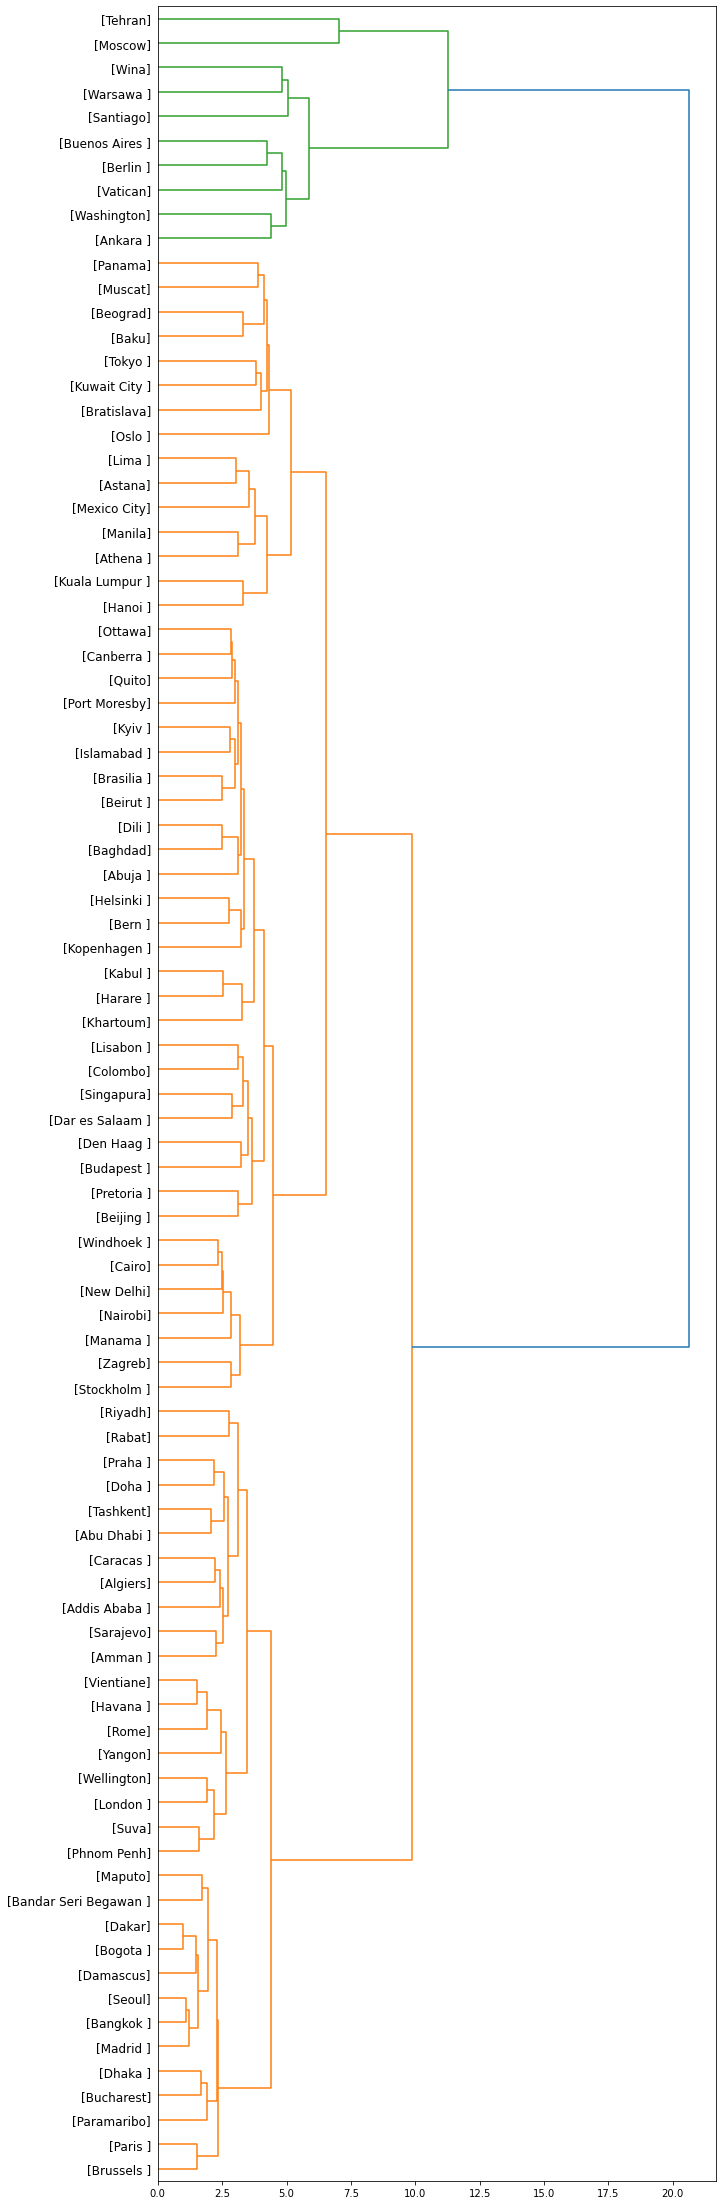

In [35]:
fig = pylab.figure(figsize=(10,40))
def llf(id):
    return '[%s]' % (embassy_grouped['Embassy'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

We can see that the embassy in Wina and Warsawa is very close in venues with the embassy in Santiago. Combine they are very close with the embassies in Buenos Aires, Berlin, Vatican, Washington and Ankara. What’s interesting in the hierarchy, the embassies in the orange hierarchy will eventually resemble the embassies in the green hierarchy. Let’s combine the embassies in the green hierarchy and see what their top venues are to get a better understanding of the hierarchy

In [36]:
def return_most_common_venues_with_value(embassy, num_top_venues):
    temp = embassy
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp = temp.round({'freq': 2})
    temp = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    dummy = temp[temp['freq'] == 0]
    temp.loc[dummy.index,'venue']= np.nan
    return temp

<ipython-input-37-f39cf54e7106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_embassies['Embassy'] = 'Green Embassy'


Text(4, 0.1, 'Green Embassies Top 10 Venues')

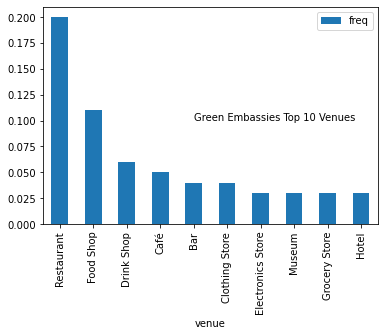

In [37]:
green_embassies =  embassy_grouped[(embassy_grouped['Embassy'] == 'Berlin ')|(embassy_grouped['Embassy'] == 'Ankara ')|(embassy_grouped['Embassy'] == 'Washington')|(embassy_grouped['Embassy'] == 'Vatican')|(embassy_grouped['Embassy'] == 'Berlin')|(embassy_grouped['Embassy'] == 'Buenos Aires ')|(embassy_grouped['Embassy'] == 'Santiago')|(embassy_grouped['Embassy'] == 'Warsawa ')|(embassy_grouped['Embassy'] == 'Wina')|(embassy_grouped['Embassy'] == 'Moscow') | (embassy_grouped['Embassy']=='Tehran') ]
green_embassies['Embassy'] = 'Green Embassy'
green_embassies.head(10)
#green_embassies.at[54,'Embassy'] = 'Two Embassies'
#green_embassies.at[78,'Embassy'] = 'Two Embassies'
green_embassies = green_embassies.groupby('Embassy').mean().T.reset_index()
green_embassies = return_most_common_venues_with_value(green_embassies, 10)
green_embassies.set_index('venue',inplace=True)
#green_embassies
green_embassies.plot(kind="bar")
plt.text(4, 0.10, 'Green Embassies Top 10 Venues')

Let's cluster the embassies and group them together in their cluster

In [44]:
from sklearn.cluster import KMeans # import k-means from clustering stage

In [45]:
# set number of clusters
kclusters = 4 #let assume we want 4 clusters of embassies

embassy_grouped_clustering = embassy_grouped.drop('Embassy', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(embassy_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 1, 0, 1, 0, 0, 1, 2, 2], dtype=int32)

In [46]:
len(kmeans.labels_[:]) ## see how many cluster values we have

89

In [47]:
df_ID_embassies_with_geo = pd.read_csv('ID_Embassies_with_geolocation.csv',index_col=0)
df_ID_embassies_with_geo.head()

,Country,Capital,Address,latitude,longitude
0,Afganistan,Kabul,Shah-re-Naw Ministry of Interior Street Kabul,34.531210,69.179090
1,Afrika Selatan,Pretoria,949 Francis Baard Street Hatfield. Pretoria,-25.745801,28.240627
2,Aljazair,Algiers,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
3,Amerika Serikat,Washington,2020 Massachusetts Avenue NW. Washington DC,38.910279,-77.046149
4,Arab Saudi,Riyadh,Diplomatic Quarter. Riyadh,24.677103,46.625145


In [51]:
#embassy_grouped.drop('Cluster Labels',axis=1,inplace=True)

In [52]:
# add clustering labels
embassy_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
embassies_merged = embassy_grouped
embassies_merged = embassies_merged.join(df_ID_embassies_with_geo.set_index('Capital'), on='Embassy')

embassies_merged.head(10)

,Cluster Labels,Embassy,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,...,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude
0,3,Abu Dhabi,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Uni Emirat Arab,Sultan Bin Zayed Street Str 32 Abu Dhabi,24.365906,54.582223
1,2,Abuja,0.0,0.0,0.04,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria,Katsina Ala Crescent 10 Abuja,9.068530,7.483750
2,1,Addis Ababa,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Etiopia,Egypt Street Mekanissa Road Woreda 05 Addis A...,9.018947,38.746032
3,0,Algiers,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Aljazair,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
4,1,Amman,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Yordania,Ali Seedo Al-Kurdi Street 13 Amman,31.947359,35.873896
5,0,Ankara,0.0,0.0,0.00,0.0,0.0,0.0,0.017544,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Turki,Prof Dr Aziz Sancar 10 Ankara,39.885977,32.858080
6,0,Astana,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Kazakhstan,Saraishyk Street Diplomatic town. Nur-Sultan,51.134260,71.425820
7,1,Athena,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.015385,...,0.0,0.0,0.0,0.0,0.0,0.0,Yunani,Marathonodromon Street 15452 Athens,37.959118,23.715552
8,2,Baghdad,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Irak,Salhiya Hay Al-l'lam 220 Zukak 5 Baghdad,33.319590,44.386390
9,2,Baku,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,Azerbaijan,Azer Aliyev 3 Nasimi Baku,40.395740,49.821620


In [53]:
embassies_merged.to_csv('ID_Embassies_with_cluster_label.csv')

In [54]:
embassies_merged = pd.read_csv('ID_Embassies_with_cluster_label.csv',index_col=0)
embassies_merged.head(5)

,Cluster Labels,Embassy,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,...,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude
0,3,Abu Dhabi,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Uni Emirat Arab,Sultan Bin Zayed Street Str 32 Abu Dhabi,24.365906,54.582223
1,2,Abuja,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria,Katsina Ala Crescent 10 Abuja,9.068530,7.483750
2,1,Addis Ababa,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Etiopia,Egypt Street Mekanissa Road Woreda 05 Addis A...,9.018947,38.746032
3,0,Algiers,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Aljazair,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
4,1,Amman,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Yordania,Ali Seedo Al-Kurdi Street 13 Amman,31.947359,35.873896


Let's make a map

In [55]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [75]:
# create map
map_clusters = folium.Map(zoom_start=1)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(embassies_merged['latitude'], embassies_merged['longitude'], embassies_merged['Embassy'], embassies_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#2c7ef7', '#2adddd', '#80ffb4', '#d4dd80', '#ff7e41', '#ff0000']


### Examine Clusters
#### Cluster 1

In [57]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 0, embassies_merged.columns[[1] + list(range(139, embassies_merged.shape[1]))]]

,Embassy,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude
3,Algiers,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Aljazair,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
5,Ankara,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Turki,Prof Dr Aziz Sancar 10 Ankara,39.885977,32.858080
6,Astana,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Kazakhstan,Saraishyk Street Diplomatic town. Nur-Sultan,51.134260,71.425820
10,Bandar Seri Begawan,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Brunei,Jalan Kebangsaan Kampung Kawasan Diplomatik Mu...,4.889737,114.941695
11,Bangkok,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Thailand,Petchburi Road 600 Bangkok,13.755181,100.526715
12,Beijing,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Tiongkok,Dong Zhi Men Wai Da Jie No 4 Chaoyang District...,39.939696,116.438361
17,Bogota,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Kolombia,Calle 70 Bogota,4.704367,-74.123511
19,Bratislava,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Slowakia,Brnianska 31. Bratislava,48.164030,17.085551
21,Bucharest,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Rumania,19 Aleea Alexandru Sector 1. Bucharest,44.456520,26.089180
22,Budapest,0.000000,0.00,0.000000,0.000000,0.0,0.000000,Hongaria,Varosligeti fasor 26. Budapest,47.509719,19.076236


#### Cluster 2

In [58]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 1, embassies_merged.columns[[1] + list(range(139, embassies_merged.shape[1]))]]

,Embassy,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude
2,Addis Ababa,0.0,0.000000,0.000000,0.0,0.0,0.0,Etiopia,Egypt Street Mekanissa Road Woreda 05 Addis A...,9.018947,38.746032
4,Amman,0.0,0.000000,0.000000,0.0,0.0,0.0,Yordania,Ali Seedo Al-Kurdi Street 13 Amman,31.947359,35.873896
7,Athena,0.0,0.000000,0.000000,0.0,0.0,0.0,Yunani,Marathonodromon Street 15452 Athens,37.959118,23.715552
14,Beograd,0.0,0.043478,0.000000,0.0,0.0,0.0,Serbia,Bulevar Kneza Aleksandra Karadjordjevica No 18...,44.794199,20.448512
16,Bern,0.0,0.000000,0.166667,0.0,0.0,0.0,Swiss,Elfenauweg 51. Bern,46.937197,7.466099
18,Brasilia,0.0,0.000000,0.000000,0.0,0.0,0.0,Brasil,SES Avenida Das Nacoes Quadra 805 Brasilia-DF,-16.793428,-49.295322
20,Brussels,0.0,0.000000,0.000000,0.0,0.0,0.0,Belgia,Boulevardde la Woluwe 38 Brussels,50.843183,4.371755
26,Caracas,0.0,0.000000,0.000000,0.0,0.0,0.0,Venezuela,Avenida El Paseo Caracas,10.452583,-66.879828
28,Dakar,0.0,0.000000,0.000000,0.0,0.0,0.0,Senegal,Avenue Cheikh Anta Diop BP. DAKAR,14.698848,-17.468628
37,Havana,0.0,0.000000,0.000000,0.0,0.0,0.0,Kuba,5ta Avenida 1607 Miramar. La Habana,23.114127,-82.433124


#### Cluster 3

In [59]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 2, embassies_merged.columns[[1] + list(range(139, embassies_merged.shape[1]))]]

,Embassy,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude
1,Abuja,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Nigeria,Katsina Ala Crescent 10 Abuja,9.068530,7.483750
8,Baghdad,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Irak,Salhiya Hay Al-l'lam 220 Zukak 5 Baghdad,33.319590,44.386390
9,Baku,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Azerbaijan,Azer Aliyev 3 Nasimi Baku,40.395740,49.821620
13,Beirut,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Lebanon,Presidential Palace Avenue Rue 68 Sector 3 Beirut,33.845390,35.541880
15,Berlin,0.0,0.013889,0.013889,0.0,0.027778,0.000000,Jerman,Lehrter 16 Berlin,52.524636,13.369861
23,Buenos Aires,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Argentina,Mariscal Ramon Castilla 2901. Buenos Aires,-34.579190,-58.399681
25,Canberra,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Australia,8 Darwin Avenue Yarralumla. Canberra,-35.303568,149.115401
33,Dili,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Timor Leste,Rua Karketu Mota-Ain No 02 Dili,-8.550615,125.569168
34,Doha,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Qatar,Al Salmiya Street Zone 66 Street 943 Onaiza,25.333074,51.511092
38,Helsinki,0.0,0.000000,0.000000,0.0,0.000000,0.000000,Finlandia,Kuusisaarentie 3. Helsinki,60.187281,24.868059


#### Cluster 4

In [60]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 3, embassies_merged.columns[[1] + list(range(139, embassies_merged.shape[1]))]]

,Embassy,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude
0,Abu Dhabi,0.0,0.0,0.0,0.0,0.0,0.0,Uni Emirat Arab,Sultan Bin Zayed Street Str 32 Abu Dhabi,24.365906,54.582223


#### Cluster 5

In [61]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 4, embassies_merged.columns[[1] + list(range(139, embassies_merged.shape[1]))]]

,Embassy,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude


#### Cluster 6

In [62]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 5, embassies_merged.columns[[1] + list(range(139, embassies_merged.shape[1]))]]

,Embassy,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude


#### Cluster 7

In [63]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 6, embassies_merged.columns[[1] + list(range(139, embassies_merged.shape[1]))]]

,Embassy,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude


#### Let's Visualize the cluster

In [64]:
embassies_merged.head(5)

,Cluster Labels,Embassy,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,...,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude
0,3,Abu Dhabi,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Uni Emirat Arab,Sultan Bin Zayed Street Str 32 Abu Dhabi,24.365906,54.582223
1,2,Abuja,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria,Katsina Ala Crescent 10 Abuja,9.068530,7.483750
2,1,Addis Ababa,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Etiopia,Egypt Street Mekanissa Road Woreda 05 Addis A...,9.018947,38.746032
3,0,Algiers,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Aljazair,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
4,1,Amman,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Yordania,Ali Seedo Al-Kurdi Street 13 Amman,31.947359,35.873896


#### Add Cluster Colors to DataFrame

In [65]:
embassies_merged['colors'] = embassies_merged['Cluster Labels'].map({0: rainbow[0],1: rainbow[1],2: rainbow[2],3: rainbow[3],4: rainbow[4],5: rainbow[5],6: rainbow[6]})

IndexError: list index out of range

In [66]:
embassies_merged.plot(figsize=(20,10),x='Restaurant', y='Hotel',c=embassies_merged['colors'], kind='scatter')

KeyError: 'colors'

from the visualization above. it seems that our cluster has overlapping on the result

#### Clustering with DBSCAN

In [67]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [68]:
embassy_grouped_clustering = embassy_grouped.drop('Embassy', 1)
for i in range(1,26):
    # run dbscan clustering
    db = DBSCAN(eps=0.5,min_samples=i).fit(embassy_grouped_clustering)
    # check cluster labels generated for each row in the dataframe
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('At Samples of %d' % i)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

At Samples of 1
Estimated number of clusters: 16
Estimated number of noise points: 0
At Samples of 2
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 3
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 4
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 5
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 6
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 7
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 8
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 9
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 10
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 11
Estimated number of clusters: 3
Estimated number of noise points: 13
At Samples of 12
Estimated number of clusters: 3
Estimated numb

In [69]:
db = DBSCAN(eps=0.5,min_samples=7).fit(embassy_grouped_clustering)
db.labels_

array([-1,  0, -1,  1,  2,  1,  1,  2, -1,  0,  1,  1,  1, -1,  2,  0,  2,
        1, -1,  1,  2,  1,  1,  0,  1, -1,  2,  1,  2,  1,  1,  1,  1, -1,
       -1,  1,  1,  2, -1, -1,  1,  0,  0,  1,  2,  0,  0,  1,  1,  1,  0,
        1,  2,  1,  0,  2,  1,  1,  1, -1,  1,  0,  2,  1, -1,  0,  1, -1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  2,
        1,  1,  1,  0])

In [70]:
embassy_grouped.drop('Cluster Labels',axis=1,inplace=True)

In [71]:
embassy_grouped.insert(0, 'Cluster Labels', db.labels_)
embassies_merged = embassy_grouped
embassies_merged = embassies_merged.join(df_ID_embassies_with_geo.set_index('Capital'), on='Embassy')

embassies_merged.head(10)

,Cluster Labels,Embassy,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arts & Crafts Store,Arts & Entertainment,...,Trail,Train Station,Tram Station,Veterinarian,Waterfront,Wine Shop,Country,Address,latitude,longitude
0,-1,Abu Dhabi,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Uni Emirat Arab,Sultan Bin Zayed Street Str 32 Abu Dhabi,24.365906,54.582223
1,0,Abuja,0.0,0.0,0.04,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria,Katsina Ala Crescent 10 Abuja,9.068530,7.483750
2,-1,Addis Ababa,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Etiopia,Egypt Street Mekanissa Road Woreda 05 Addis A...,9.018947,38.746032
3,1,Algiers,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Aljazair,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627
4,2,Amman,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Yordania,Ali Seedo Al-Kurdi Street 13 Amman,31.947359,35.873896
5,1,Ankara,0.0,0.0,0.00,0.0,0.0,0.0,0.017544,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Turki,Prof Dr Aziz Sancar 10 Ankara,39.885977,32.858080
6,1,Astana,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Kazakhstan,Saraishyk Street Diplomatic town. Nur-Sultan,51.134260,71.425820
7,2,Athena,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.015385,...,0.0,0.0,0.0,0.0,0.0,0.0,Yunani,Marathonodromon Street 15452 Athens,37.959118,23.715552
8,-1,Baghdad,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,Irak,Salhiya Hay Al-l'lam 220 Zukak 5 Baghdad,33.319590,44.386390
9,0,Baku,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,Azerbaijan,Azer Aliyev 3 Nasimi Baku,40.395740,49.821620


In [72]:
embassies_merged.to_csv('ID_Embassies_with_cluster_label_dbscan.csv')

In [73]:
embassies_merged = pd.read_csv('ID_Embassies_with_cluster_label_dbscan.csv',index_col=0)

In [76]:
embassies_merged['colors'] = embassies_merged['Cluster Labels'].map({-1: rainbow[0],0: rainbow[1],1: rainbow[2],2: rainbow[3],3: rainbow[4]})

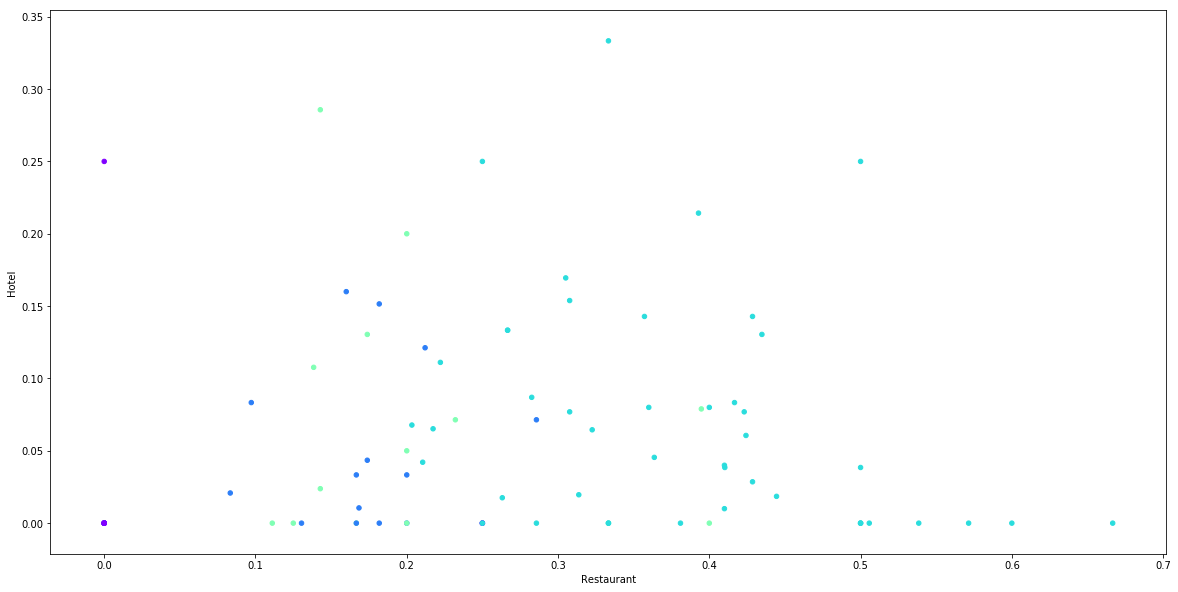

In [77]:
embassies_merged.plot(figsize=(20,10), x='Restaurant', y='Hotel',c=embassies_merged['colors'], kind='scatter')

In [78]:
# create map
map_clusters = folium.Map(zoom_start=1)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(-1,4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(embassies_merged['latitude'], embassies_merged['longitude'], embassies_merged['Embassy'], embassies_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']


In [84]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == -1, embassies_merged.columns[[1] + list(range(146, embassies_merged.shape[1]))]]

,Embassy,Address,latitude,longitude,colors
0,Abu Dhabi,Sultan Bin Zayed Street Str 32 Abu Dhabi,24.365906,54.582223,#8000ff
2,Addis Ababa,Egypt Street Mekanissa Road Woreda 05 Addis A...,9.018947,38.746032,#8000ff
8,Baghdad,Salhiya Hay Al-l'lam 220 Zukak 5 Baghdad,33.319590,44.386390,#8000ff
13,Beirut,Presidential Palace Avenue Rue 68 Sector 3 Beirut,33.845390,35.541880,#8000ff
18,Brasilia,SES Avenida Das Nacoes Quadra 805 Brasilia-DF,-16.793428,-49.295322,#8000ff
25,Canberra,8 Darwin Avenue Yarralumla. Canberra,-35.303568,149.115401,#8000ff
33,Dili,Rua Karketu Mota-Ain No 02 Dili,-8.550615,125.569168,#8000ff
34,Doha,Al Salmiya Street Zone 66 Street 943 Onaiza,25.333074,51.511092,#8000ff
38,Helsinki,Kuusisaarentie 3. Helsinki,60.187281,24.868059,#8000ff
39,Islamabad,Diplomatic Enclave I Street 5 Islamabad,33.721480,73.043290,#8000ff


In [85]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 0, embassies_merged.columns[[1] + list(range(146, embassies_merged.shape[1]))]]

,Embassy,Address,latitude,longitude,colors
1,Abuja,Katsina Ala Crescent 10 Abuja,9.068530,7.483750,#2c7ef7
9,Baku,Azer Aliyev 3 Nasimi Baku,40.395740,49.821620,#2c7ef7
15,Berlin,Lehrter 16 Berlin,52.524636,13.369861,#2c7ef7
23,Buenos Aires,Mariscal Ramon Castilla 2901. Buenos Aires,-34.579190,-58.399681,#2c7ef7
41,Khartoum,Street 60 Block No 12 Al Riyadh Area Khartoum,15.551770,32.532410,#2c7ef7
42,Kopenhagen,Alle 1 Hellerup Copenhagen,55.722238,12.559591,#2c7ef7
45,Kyiv,17 Universytetska Street. Kyiv,50.419465,30.480809,#2c7ef7
46,Lima,Avenida Las Flores 334-336 San Isidro. Lima,-12.096272,-77.047005,#2c7ef7
50,Manama,Villa 2113 Road 2432 Manama,26.222771,50.588948,#2c7ef7
54,Moscow,Novokuznetskaya Ulitsa No 12 Moscow,55.741469,37.615561,#2c7ef7


In [86]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 1, embassies_merged.columns[[1] + list(range(146, embassies_merged.shape[1]))]]

,Embassy,Address,latitude,longitude,colors
3,Algiers,Avenue Souidani Boudjemaa 61 Algiers,36.743950,3.083627,#2adddd
5,Ankara,Prof Dr Aziz Sancar 10 Ankara,39.885977,32.858080,#2adddd
6,Astana,Saraishyk Street Diplomatic town. Nur-Sultan,51.134260,71.425820,#2adddd
10,Bandar Seri Begawan,Jalan Kebangsaan Kampung Kawasan Diplomatik Mu...,4.889737,114.941695,#2adddd
11,Bangkok,Petchburi Road 600 Bangkok,13.755181,100.526715,#2adddd
12,Beijing,Dong Zhi Men Wai Da Jie No 4 Chaoyang District...,39.939696,116.438361,#2adddd
17,Bogota,Calle 70 Bogota,4.704367,-74.123511,#2adddd
19,Bratislava,Brnianska 31. Bratislava,48.164030,17.085551,#2adddd
21,Bucharest,19 Aleea Alexandru Sector 1. Bucharest,44.456520,26.089180,#2adddd
22,Budapest,Varosligeti fasor 26. Budapest,47.509719,19.076236,#2adddd


In [87]:
embassies_merged.loc[embassies_merged['Cluster Labels'] == 2, embassies_merged.columns[[1] + list(range(146, embassies_merged.shape[1]))]]

,Embassy,Address,latitude,longitude,colors
4,Amman,Ali Seedo Al-Kurdi Street 13 Amman,31.947359,35.873896,#80ffb4
7,Athena,Marathonodromon Street 15452 Athens,37.959118,23.715552,#80ffb4
14,Beograd,Bulevar Kneza Aleksandra Karadjordjevica No 18...,44.794199,20.448512,#80ffb4
16,Bern,Elfenauweg 51. Bern,46.937197,7.466099,#80ffb4
20,Brussels,Boulevardde la Woluwe 38 Brussels,50.843183,4.371755,#80ffb4
26,Caracas,Avenida El Paseo Caracas,10.452583,-66.879828,#80ffb4
28,Dakar,Avenue Cheikh Anta Diop BP. DAKAR,14.698848,-17.468628,#80ffb4
37,Havana,5ta Avenida 1607 Miramar. La Habana,23.114127,-82.433124,#80ffb4
44,Kuwait City,Daiya Block 1 Rashed Ahmed Al-Roumi Street,29.354400,48.009860,#80ffb4
52,Maputo,Streets No 141 Sommerschield Maputo,-25.965530,32.583220,#80ffb4
